# Exploratory Data Analysis

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None
above = '../../../'

## Final dropping of columns

In [63]:
# Read in the final merge **change the name to the actual file once its done
data = pd.read_pickle(above + 'merged-sales-val-macro-dem-crime.pkl')
# Columns to drop
drop = ["s_neighborhood", "s_building_class_category", "s_block", "s_lot", "s_address", "s_apt_number", 
        "s_gross_sqft", "s_tax_class_at_sale", "s_residential_units", "s_commercial_units",
        "s_year", "v_bldgcl", "v_bldfront", "a_year_month", "s_borough_code", "c_year_month", "s_sale_date",
        "s_sale_month", "s_sale_year"]

data.drop(drop, axis =1, inplace=True)
num_rows = data.shape[0]
print(num_rows)

401790


In [68]:
((data.s_sale_price.sum() / 1000000000))/ 7

61.761145533

# Removal of some Outliers

In [3]:
#(data.s_gross_sqft == 0).sum()

In [4]:
# This is the count of rows for each total number of units (first 20 values) 
data.groupby(data.s_total_units).count().s_borough.head(20)

s_total_units
0.0     114499
1.0     169235
2.0      72671
3.0      22858
4.0       5684
5.0       1712
6.0       3865
7.0        831
8.0       1648
9.0        592
10.0       807
11.0       316
12.0       308
13.0       139
14.0       164
15.0       210
16.0       492
17.0       188
18.0       179
19.0       119
Name: s_borough, dtype: int64

In [5]:
(114499 + 169235 + 72671 +22858)/ num_rows 

0.9439333980437542

In [6]:
#data = data[data['s_total_units'] < 4]


In [7]:
data[data.s_sale_price == 147000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
166321,1,10016.0,1.0,0.0,1989.0,R4,147000000,1009431002,411,197,57.0,149432,40.746742,-73.972741,Murray Hill-Kips Bay,2.42,4.115,174.689905,165.188,237.46,238.405,0.088065,0.745125,318921.0,17079.078,1961.531905,6.1,59742.833333,-0.049846,-0.003632,0.00009,0.003487,-0.00016,0.000882,-0.031915,-0.143952,0.000719,0.001876,-0.006133,-0.016129,0.004182,1238675,86707.25,0.07,76797.85,0.062,159789.075,0.129,121390.15,0.098,52024.35,0.042,388943.95,0.314,353022.375,0.285,1636268.0,967034.388,0.591,279801.828,0.171,26180.288,0.016,215987.376,0.132,3272.536,0.002,222532.448,0.136,867643,120602.377,0.139,354865.987,0.4

In [8]:
data[data.s_sale_price == 67602825]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
58302,1,10014.0,1.0,0.0,1920.0,R4,67602825,1006011002,200,150,10.0,144073,40.730063,-74.006891,West Village,1.959545,3.915,162.103381,136.602,227.842,227.877,0.081935,2.069337,313227.0,16129.418,1298.101818,8.3,56912.0,-0.010558,-0.010864,-0.00541,-0.000498,0.002724,0.002076,0.144144,-0.041957,0.000521,0.002596,0.043219,-0.023529,-0.00016,1213989,87407.208,0.072,80123.274,0.066,151748.625,0.125,131110.812,0.108,47345.571,0.039,377550.579,0.311,338702.931,0.279,1619090.0,971454.0,0.6,280102.57,0.173,19429.08,0.012,202386.25,0.125,3238.18,0.002,213719.88,0.132,850490,122470.56,0.144,366561.19,0.431,244090.63,0.

In [9]:
data[data.s_sale_price == 51000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
156690,1,10021.0,1.0,3031.0,1910.0,A4,51000000,1014050008,30,100,6.0,15889000,40.769538,-73.964147,Upper East Side-Carnegie Hill,2.865217,4.432,173.546413,161.943,235.288,235.961,0.071613,1.622223,317598.0,16616.54,1824.197826,6.6,58001.0,-0.014003,-0.005721,0.004163,0.005907,0.002424,0.000857,-0.159091,0.008151,0.000532,-0.000944,0.008437,-0.014925,-0.001296,1238675,86707.25,0.07,76797.85,0.062,159789.075,0.129,121390.15,0.098,52024.35,0.042,388943.95,0.314,353022.375,0.285,1636268.0,967034.388,0.591,279801.828,0.171,26180.288,0.016,215987.376,0.132,3272.536,0.002,222532.448,0.136,867643,120602.377,0.139,354

In [10]:
data[data.s_sale_price == 49000000]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
370501,1,10019.0,1.0,16318.0,1987.0,R4,49000000,1010051003,0,0,47.0,582318,40.761736,-73.980883,Midtown-Midtown South,2.869048,4.4675,197.816789,200.983,249.957,256.487,1.692333,2.28499,326563.0,18654.383,2653.625238,4.0,65418.75,0.011037,0.005288,-0.002226,0.003986,0.002181,0.001609,0.123631,-0.022473,0.000386,0.002219,-0.017161,0.0,0.005609,1249838,88738.498,0.071,64991.576,0.052,163728.778,0.131,118734.61,0.095,47493.844,0.038,401197.998,0.321,364952.696,0.292,1628701.0,964190.992,0.592,275250.469,0.169,34202.721,0.021,228018.14,0.14,1628.701,0.001,214988.532,0.132,886282,142691.402,0.161,337673.442,0.381,

In [11]:
test = data[(data.s_building_class_at_sale != "C6") 
         & (data.s_building_class_at_sale != "D0") 
         & (data.s_building_class_at_sale != "D4")]
((test.s_sale_price/test.v_fullval) > 10).sum()

10041

In [12]:
test[((test.s_sale_price/test.v_fullval) > 10)]

,s_borough,s_zipcode,s_total_units,s_land_sqft,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_ltfront,v_ltdepth,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count
90,2,10459.0,0.0,7244.0,0.0,C4,750000,2026790043,50,144,3.0,57600,40.824583,-73.899593,Longwood,3.391905,4.7550,167.189630,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754000,1283.124286,9.1,57021.000000,0.029070,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.041710,0.000531,-0.000803,0.032955,-0.021505,-0.001289,861146,137783.360,0.160,126588.462,0.147,237676.296,0.276,145533.674,0.169,63724.804,0.074,95587.206,0.111,54252.198,0.063,1392002.0,342432.492,0.246,503904.724,0.362,13920.020,0.010,55680.08,0.04,2784.004,0.002,524784.754,0.377,512320,30739.200,0.060,169577.920,0.331,173164.1

In [13]:
data[data.s_building_class_at_sale == "D4"].s_sale_price.max()

261000000

In [14]:
data[data.s_building_class_at_sale == "D4"][data[data.s_building_class_at_sale == "D4"].s_sale_price == 173298644].s_bbl

161373    1013730001
Name: s_bbl, dtype: object

In [15]:
data = data[data['s_building_class_at_sale'] != 16.0]
data = data[data['s_building_class_at_sale'] != 0.0]
data = data[data['s_building_class_at_sale'] != 4.0]
data = data[data['s_total_units'] == 1]
data = data[data['s_sale_price'] > 50000]
data = data[data['s_sale_price'] != 67602825]
data = data[data['s_sale_price'] != 147000000]
data.drop(["s_total_units"], axis =1, inplace=True)

In [16]:
num_rows = data.shape[0]

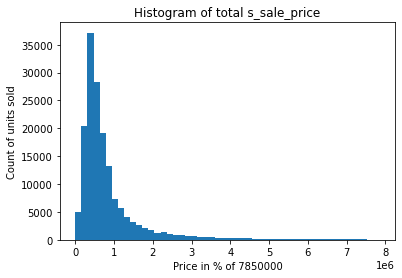

In [17]:
# Histogram of the sales vs 
def hist_col(data, col, b):
    data99_max = data[data[col] <= np.percentile(data[col],99)][col].max()
    plt.hist(data[col],bins=b, range=(0, np.percentile(data[col],99)))
    plt.xlabel(f'Price in % of {data99_max}')
    plt.ylabel("Count of units sold")
    plt.title('Histogram of total ' + col)
    plt.show()
hist_col(data, 's_sale_price', 50)

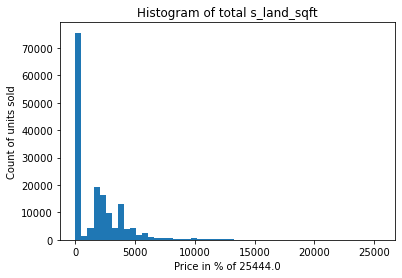

In [18]:
hist_col(data, "s_land_sqft", 50)

In [19]:
# Number of 0 values in sales s_land_sqft
print(f'Zero values for sqft of land in Sales: {((data.s_land_sqft) == 0).sum()}')
# Number of 0 values in valuation lotfront or lotdepth
print(f'Zero values for sqft in Valuation: {((data.v_ltfront * data.v_ltdepth) == 0).sum()}')
# Where we have 0 values in either sales or valuation
miss_area = data[(data.s_land_sqft == 0) & ((data.v_ltfront * data.v_ltdepth) == 0)]
print(f'Total number of missing values for area that we can not impute {miss_area.shape[0]}')

Zero values for sqft of land in Sales: 75111
Zero values for sqft in Valuation: 62919
Total number of missing values for area that we can not impute 60804


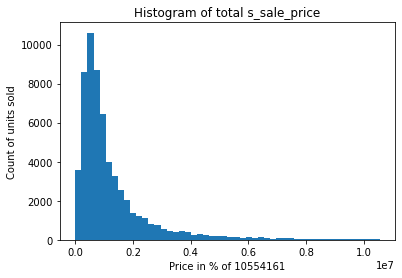

In [20]:
# Histogram of sales with missing values for square footage
hist_col(miss_area, 's_sale_price', 50)

## Imputing the missing Area

In [21]:
# Remove all rows that we can not impute
data.drop(axis =0, index = miss_area.index, inplace=True)
print(f'Check that right number rows dropped. Original - New: {num_rows - data.shape[0]} Non imputable: {miss_area.shape[0]}')

Check that right number rows dropped. Original - New: 60804 Non imputable: 60804


In [22]:
# Get rid of the original index values that are no longer applicable
data = data.reset_index(drop=True)

In [23]:
data["prod_vf_vd"] = data.v_ltfront * data.v_ltdepth
def create_imputed_land_area(row):
    if row["s_land_sqft"] == 0:
        return row["prod_vf_vd"]
    else:
        return row["s_land_sqft"]
data["imputed_land_area"] = data.apply(lambda row: create_imputed_land_area(row), axis=1)

In [24]:
# Sanity check that there are no zero values for area
print(f'Count of missing area values:{(data.imputed_land_area == 0).sum()}')
# Compare the square footage of the imputed area and product of v_ltfront and v_ltdepth
np.abs((data.imputed_land_area - data.prod_vf_vd)).sum()/(data.imputed_land_area.sum())

Count of missing area values:0


0.23462718746647657

In [25]:
drop = ["s_land_sqft", "v_ltfront", "v_ltdepth", "prod_vf_vd"]
data.drop(drop, axis =1, inplace=True)

## Imputing Total Units

In [26]:
#data[data.s_total_units == 0].groupby(data.s_building_class_at_sale).count()

It makes sense that cooperatives would have no information on the number of units available within the apartment as the building is owned by everyone as a whole and it is then split up amongst the residents. As a result all of the cooperatives will not have total

In [27]:
coops = data[(data.s_building_class_at_sale == "C6") 
         | (data.s_building_class_at_sale == "D0") 
         | (data.s_building_class_at_sale == "D4")]

coops.shape[0]

0

In [28]:
data2 = data.copy()

In [29]:
coops.index.to_numpy()

array([], dtype=int64)

In [30]:
coops_index = coops.index.to_numpy()

In [31]:
data.at[coops_index , "s_total_units"] = 1
(data.s_total_units == 0).sum()

0

In [32]:
# The remaining values were errors in recording so we will drop these rows.
miss_tot_units = data[data.s_total_units == 0].index.to_numpy()
data.drop(axis =0, index = miss_tot_units, inplace=True)
data = data.reset_index(drop=True)

This is why we're going to remove all coop values that are larger than 80,000,000. Because we are not focused on buildings.
https://ny.curbed.com/2014/9/4/10051426/71-3m-park-avenue-pad-is-nycs-most-expensive-co-op-ever

In [33]:
large_coop = coops[coops.s_sale_price > 80000000].index.to_numpy()
data.drop(axis = 0, index = large_coop, inplace=True)
data = data.reset_index(drop=True)

In [34]:
# The median of sales price 
print(data.s_sale_price.median())
# The median of the valuation assessment
print(data.v_fullval.median())
# The median difference between the sales price and the valuation assessment
print(np.abs(data.s_sale_price - data.v_fullval).median())
# The mean difference between the sales price and the valuation assessment
print(np.abs(data.s_sale_price - data.v_fullval).mean())

496974.0
422546.0
97000.0
312403.099302615


In [35]:
# Double check that there are no missing values anywhere
data.columns[data.isnull().sum() != 0]

Index(['v_stories', 'v_latitude', 'v_longitude', 'v_nta', 's_total_units'], dtype='object')

## Last Imputation of Missing Values

In [36]:
miss_v_stories = data.v_stories[data.v_stories.isnull()].index.to_numpy()
len(miss_v_stories)

833

In [37]:
data.at[miss_v_stories, "v_stories"] = 1

There are only 1591 rows where we having missing number of stories. For now we can leave this data in and just set the value of v_stories in these rows to 0.

In [38]:
miss_v_latitude = data.v_latitude[data.v_latitude.isnull()].index.to_numpy()
miss_v_longitude = data.v_longitude[data.v_longitude.isnull()].index.to_numpy()
print(len(miss_v_latitude))
print((miss_v_latitude - miss_v_longitude).sum())
data.drop(axis =0, index = miss_v_latitude, inplace=True)

291
0


In [39]:
# Get rid of the original index values that are no longer applicable
data = data.reset_index(drop=True)

It looks like there are 1776 rows with missing latitude longitude pairs and there in every row that is missing either lat or lon it is missing both values. We will drop these rows as we wish to have the crime data engineered using these coordinates.

In [40]:
len(data.v_nta[data.v_nta.isnull()])

0

### Preventing leakage by keeping instances of a unit together

In [41]:
def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index))
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

In [42]:
duplicates = data.groupby('s_bbl').count().v_fullval[(data.groupby('s_bbl').count().v_fullval > 1)].index.to_numpy()
data[data.s_bbl.isin(duplicates)].shape[0] / data.shape[0]

0.28512700470101177

In [43]:
data[~data.s_bbl.isin(duplicates)].shape[0] / data.shape[0]

0.7148729952989882

In [44]:
data[data.s_bbl.isin(duplicates)].shape[0] / 2 

14738.5

In [45]:
pct = .1

In [46]:
dup_bbl = data.groupby('s_bbl').count().v_fullval[(data.groupby('s_bbl').count().v_fullval > 1)].index.to_numpy()
d_dup = data[data.s_bbl.isin(dup_bbl)]
d_dup_selected = np.random.choice(dup_bbl, int(dup_bbl.shape[0] * pct))
d_uniq = data[~data.s_bbl.isin(dup_bbl)]

small_uniq, big_uniq = trainTest(d_uniq, pct)
small_dup, big_dup = d_dup[d_dup.s_bbl.isin(d_dup_selected)], d_dup[~d_dup.s_bbl.isin(d_dup_selected)]
small = pd.concat([small_uniq, small_dup], axis = 0)
big = pd.concat([big_uniq, big_dup], axis = 0) 

In [47]:
small.shape[0]

10187

In [48]:
big.shape[0]

93195

In [49]:
d_dup_selected = np.random.choice(dup_bbl, int(dup_bbl.shape[0] * pct))

In [50]:
data[data.s_bbl.isin(d_dup_selected)].shape[0] / d_dup.shape[0]

0.09532856125114496

In [51]:
small_uniq.shape[0] / d_uniq.shape[0]

0.09999323455787835

In [52]:
len(data.groupby('s_bbl').count().v_fullval[(data.groupby('s_bbl').count().v_fullval > 1)].index.to_numpy())

13960

In [53]:
def rand_keep_uniqbbl(data, pct):
    dup_bbl = data.groupby('s_bbl').count().v_fullval[(data.groupby('s_bbl').count().v_fullval > 1)].index.to_numpy()
    d_dup = data[data.s_bbl.isin(dup_bbl)]
    d_dup_selected = np.random.choice(dup_bbl, int(dup_bbl.shape[0] * pct))
    d_uniq = data[~data.s_bbl.isin(dup_bbl)]

    small_uniq, big_uniq = trainTest(d_uniq, pct)
    small_dup, big_dup = d_dup[d_dup.s_bbl.isin(d_dup_selected)], d_dup[~d_dup.s_bbl.isin(d_dup_selected)]
    small = pd.concat([small_uniq, small_dup], axis = 0)
    big = pd.concat([big_uniq, big_dup], axis = 0)  

    return small, big
        

In [54]:
# Find the categorical columns to convert
cat_col = data.select_dtypes(exclude=['int64', 'float']).columns.to_list()
print(cat_col)

# s_bbl is actually not needed anymore so we can remove it from the list and the dataframe
cat_col.remove('s_bbl')
# data.drop(columns = ['s_bbl'], inplace=True)
# data = data.reset_index(drop=True)
print(cat_col)

['s_building_class_at_sale', 's_bbl', 'v_nta']
['s_building_class_at_sale', 'v_nta']


Feature engineering the Datetime variable to convert it to numerical https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96#:~:text=Dates%20and%20times%20are%20rich,turn%20them%20into%20numerical%20data.

In [55]:
data.describe()

,s_borough,s_zipcode,s_year_built,s_sale_price,v_stories,v_fullval,v_latitude,v_longitude,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area,s_total_units
count,103382.000000,103382.000000,103382.000000,1.033820e+05,103382.000000,1.033820e+05,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,1.033820e+05,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382.000000,103382

In [56]:
data.to_pickle(above + 'post_eda_pre_ordinal.pkl')

Ordinal encoding: https://www.datacamp.com/community/tutorials/categorical-data

In [57]:
# We have to use ordinal encoding to transform the categorical to numerical
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# Create transformation function, input data and list of categorical columns, returns replace map
def ordinal_map(df, cols):
    replace_map = {}
    encoder = OrdinalEncoder()
    encoder.fit(data[cols])
    cats = encoder.categories_
    for i in range(len(cols)):
        c =  data[cat_col[i]].unique().tolist()        
        o = list(map(lambda x:[x], c)) 
        result = encoder.fit_transform(o)
        cat = cats[i]
        replace_map[cols[i]] = {k: v for k,v in zip(cats[i], [x[0] for x in result.tolist()])}
    return replace_map

r_map = ordinal_map(data, cat_col)
data.replace(r_map, inplace=True)

In [58]:
r_map

{'s_building_class_at_sale': {'A0': 1.0,
  'A1': 5.0,
  'A2': 2.0,
  'A3': 23.0,
  'A4': 21.0,
  'A5': 3.0,
  'A6': 8.0,
  'A7': 22.0,
  'A9': 0.0,
  'B1': 7.0,
  'B2': 4.0,
  'B3': 24.0,
  'B9': 20.0,
  'C0': 10.0,
  'C1': 11.0,
  'C2': 12.0,
  'C3': 13.0,
  'C5': 9.0,
  'D6': 6.0,
  'G0': 28.0,
  'R1': 25.0,
  'R2': 15.0,
  'R3': 27.0,
  'R4': 14.0,
  'R6': 16.0,
  'S1': 26.0,
  'S2': 18.0,
  'S9': 19.0,
  'V0': 29.0,
  'Z0': 17.0},
 'v_nta': {'Allerton-Pelham Gardens': 32.0,
  "Annadale-Huguenot-Prince's Bay-Eltingville": 56.0,
  'Arden Heights': 182.0,
  'Astoria': 11.0,
  'Auburndale': 0.0,
  'Baisley Park': 20.0,
  'Bath Beach': 150.0,
  'Battery Park City-Lower Manhattan': 130.0,
  'Bay Ridge': 145.0,
  'Bayside-Bayside Hills': 155.0,
  'Bedford': 171.0,
  'Bedford Park-Fordham North': 168.0,
  'Bellerose': 38.0,
  'Belmont': 109.0,
  'Bensonhurst East': 131.0,
  'Bensonhurst West': 175.0,
  'Borough Park': 178.0,
  'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel': 53.0,


In [59]:
data.head(5)

,s_borough,s_zipcode,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_stories,v_fullval,v_latitude,v_longitude,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area,s_total_units
0,2,10458.0,1910.0,5.0,329000,2030390064,2.0,365000,40.856635,-73.892647,45.0,3.391905,4.755,167.18963,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754,1283.124286,9.1,57021.0,0.02907,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.04171,0.000531,-0.000803,0.032955,-0.021505,-0.001289,861146,137783.36,0.16,126588.462,0.147,237676.296,0.276,145533.674,0.169,63724.804,0.074,95587.206,0.111,54252.198,0.063,1392002.0,342432.492,0.246,503904.724,0.362,13920.02,0.01,55680.08,0.04,2784.004,0.002,524784.754,0.377,512320,30739.2,0.06,169577.92,0.331,173164.16,0.338,112710.4,0.22,17418.88,0.034,9221.76,0.018,8

In [60]:
# Remove this after the feature engineering is done, if any
data.drop(columns = ['v_latitude', 'v_longitude'], inplace=True)

In [61]:
data = data.reset_index(drop=True)
data.to_pickle(above + 'post_eda.pkl', protocol=4)

# PCA

In [ ]:
data = pd.read_pickle(above + 'post_eda.pkl')

In [ ]:
data

In [ ]:
data = data.sample(n = 1000)

In [ ]:
#normed_data = (data - data.min()) / data.to_numpy().ptp(0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.loc[:, data.columns != 's_sale_price']  #independent columns
y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
scaler.fit(X)
scaled_data = scaler.transform(X)

In [ ]:
scaled_data

In [ ]:
data.cov()

In [ ]:
data

In [ ]:
eigval, eigvec = np.linalg.eig(data.cov())

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 119)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape

In [ ]:
x_pca.shape

In [ ]:
pca.singular_values_

In [ ]:
principal_df = pd.DataFrame(data = x_pca, columns = ["Principal Component " + str(x) for x in range(1, 120)])

In [ ]:
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
pca.explained_variance_ratio_[0:20].sum()

In [ ]:
# plt.subplots=(1,2,1)
plt.bar(np.arange(0,119),pca.explained_variance_ratio_[0:119])
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(0,119),cumsum)

Maybe I should be using this for normalizing the data instead of taking the absoulte value of the dataframe to get rid of negative values https://stats.stackexchange.com/questions/341332/how-to-scale-for-selectkbest-for-feature-selection

Following the workflow from the following notebook: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [ ]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
return X_train_fs, X_test_fs, fs

In [ ]:
# data = pd.read_pickle(above + 'post_eda.pkl')
data = pd.read_pickle(above + 'd_PCmd.pkl')
# data[data.s_class_at]

In [ ]:
# data = pd.read_pickle(above + 'post_eda.pkl')
# data = data[['d_pop_25_years_and_over',
#        'm_case_shiller_ny_home_price_index_%chg',
#        'm_us_real_median_household_income_%chg', 'c_count',
#        'm_inflation_rate_%chg', 's_total_units', 'm_sp500_index_%chg',
#        'm_real_gross_domestic_product_%chg', 's_building_class_at_sale',
#        'm_10yr_treasury_constant_maturity_rate',
#        'm_30yr_fixed_rate_mortgage_avg_in_us', 's_zipcode',
#        'd_households_from_10000_to_14999_pct', 'v_stories', 'v_nta',
#        'm_sp500_index', 'd_high_school_graduate_pct', 's_year_built',
#        'imputed_land_area', 'v_fullval', 's_sale_price']]
# data = data[data['s_sale_price'] < np.percentile(data['s_sale_price'],99)]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.loc[:, data.columns != 's_sale_price']  #independent columns
y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
scaled_X = scaler.fit_transform(X)
# scaled_y = scaler.fit_transform(y)

In [ ]:
# data = pd.read_pickle(above + 'post_eda.pkl')
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = data.loc[:, data.columns != 's_sale_price']  #independent columns
# y = data.loc[:, data.columns == 's_sale_price']    #target column sales price
# scaler.fit(data.loc[:, data.columns != 's_sale_price'])
# scaled_data = scaler.transform(data.loc[:, data.columns != 's_sale_price'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor
# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_test_pred = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(y_test_pred - y_test.values.ravel()))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

In [ ]:
plt.plot(np.arange(0, len(y_test.values.ravel())),(np.abs(y_test_pred - y_test.values.ravel())/(y_test.values.ravel())))

In [ ]:
np.median(np.abs(y_test_pred - y_test.values.ravel()))

In [ ]:
np.abs(y_test_pred - y_test.values.ravel()).max()

In [ ]:
from sklearn import metrics
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))